In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
del df['Unnamed: 0']
del df['label']
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
X = df['text']
y = df['label_num']

In [ ]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [ ]:
df.dropna()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [ ]:
import re
def preprocess_text(text):
    text = re.sub(r'[^\w\s\n]', '', text)
    text = re.sub(r'<.*?>', '', text)
    return text

X = [preprocess_text(text) for text in X]
df['preprocess'] = X

In [ ]:
df.head()

,text,label_num,preprocess
0,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291\r\nthis...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january 9 2001\r\n see at...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat\r\nho ho ho we re aroun...
3,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap mai...
4,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs\r\nthis deal is to ...


In [ ]:
del df['text']
df = df[['preprocess', 'label_num']]
df.head()

,preprocess,label_num
0,Subject enron methanol meter 988291\r\nthis...,0
1,Subject hpl nom for january 9 2001\r\n see at...,0
2,Subject neon retreat\r\nho ho ho we re aroun...,0
3,Subject photoshop windows office cheap mai...,1
4,Subject re indian springs\r\nthis deal is to ...,0


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocess'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

print("R-squared value:", r_squared)

R-squared value: 0.7524611169713947


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype("int32")
class_names = ["Ham", "Spam"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         Ham       0.92      0.99      0.96       742
        Spam       0.98      0.78      0.87       293

    accuracy                           0.93      1035
   macro avg       0.95      0.89      0.91      1035
weighted avg       0.94      0.93      0.93      1035



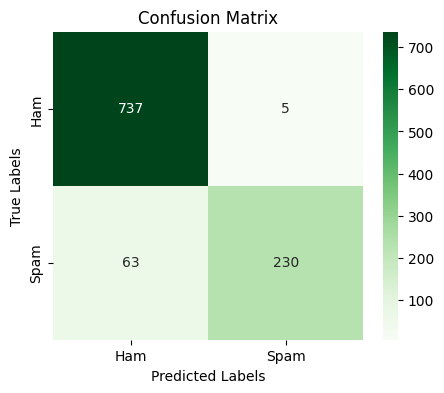

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
y_pred = dt.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9536231884057971
Precision: 0.9152542372881356
Recall: 0.9215017064846417
F1 Score: 0.9183673469387754


In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

print("R-squared value:", r_squared)

R-squared value: 0.7714874474485526


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (dt.predict(X_test) > 0.5).astype("int32")
class_names = ["Ham", "Spam"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         Ham       0.97      0.97      0.97       742
        Spam       0.92      0.92      0.92       293

    accuracy                           0.95      1035
   macro avg       0.94      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



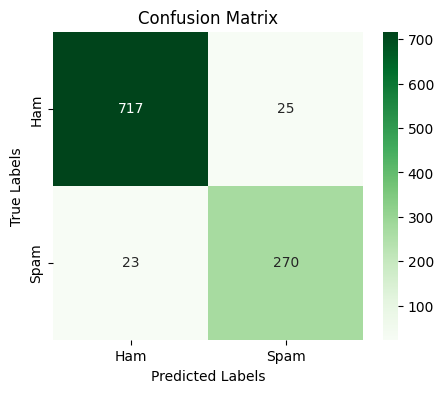

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
y_pred = lr.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9835748792270531
Precision: 0.96
Recall: 0.9829351535836177
F1 Score: 0.9713322091062394


In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

print("R-squared value:", r_squared)

R-squared value: 0.9190684709713624


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (lr.predict(X_test) > 0.5).astype("int32")
class_names = ["Ham", "Spam"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99       742
        Spam       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



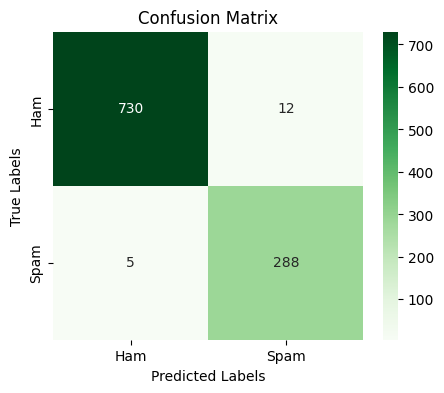

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_train_array = X_train.toarray()
gnb.fit(X_train_array, y_train)

GaussianNB()

In [ ]:
X_test_array = X_test.toarray()
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
y_pred = gnb.predict(X_test_array)
y_pred_classes = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9497584541062802
Precision: 0.9381818181818182
Recall: 0.8805460750853242
F1 Score: 0.9084507042253521


In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

print("R-squared value:", r_squared)

R-squared value: 0.752444734735932


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (gnb.predict(X_test_array) > 0.5).astype("int32")
class_names = ["Ham", "Spam"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         Ham       0.95      0.98      0.97       742
        Spam       0.94      0.88      0.91       293

    accuracy                           0.95      1035
   macro avg       0.95      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035



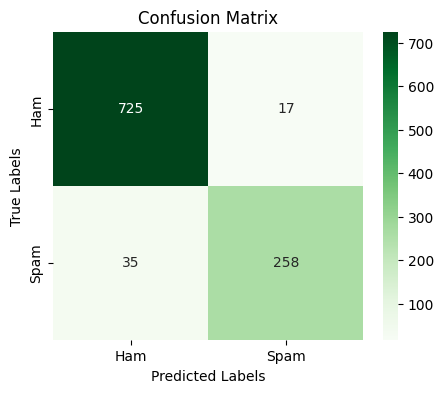

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()